# RandomForest_classifier

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [3]:
# 데이터 불러오기
middle = pd.read_csv('e:/Git_private_dodo_Riley/laptop_desktop/Code_SJH/통계학머신러닝_양진욱/data/middle.csv')
middle.head()

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0


In [4]:
# target 분리
X = middle.iloc[:,:-1].values
y = middle.iloc[:,-1].values

X.shape, y.shape

((100, 5), (100,))

In [6]:
# scaling 진행
scaler = StandardScaler()
X_reg = scaler.fit(X).transform(X)
X_reg.shape

(100, 5)

In [22]:
# 모델 학습
classifier = ensemble.RandomForestClassifier(n_estimators=20, 
                                             max_depth=3, # 깊이 제한
                                             criterion='gini', # 기준으로 지니계수 사용
                                             random_state=10) # seed 고정
classifier.fit(X_reg,y)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [23]:
# 예측 및 평가
y_pred = classifier.predict(X_reg)

print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[19 12]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        31
           1       0.85      1.00      0.92        69

    accuracy                           0.88       100
   macro avg       0.93      0.81      0.84       100
weighted avg       0.90      0.88      0.87       100



# AdaBoost_classifier

In [33]:
# 의사결정나무를 기반으로 boost 모델 학습 및 예측
classifier2 = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=20)
classifier2.fit(X_reg,y)
y_pred2 = classifier2.predict(X_reg)
print(confusion_matrix(y,y_pred2))
print(classification_report(y,y_pred2))

[[31  0]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        69

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# RandomForest_regressor

In [35]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [36]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [37]:
X = diabetes.data
y = diabetes.target
feature = diabetes.feature_names

In [39]:
X.shape, y.shape

((442, 10), (442,))

In [52]:
# 정규화 미진행
regressor = ensemble.RandomForestRegressor()
regressor.fit(X,y)
y_pred = regressor.predict(X)
print(regressor.score(X,y_pred))

1.0


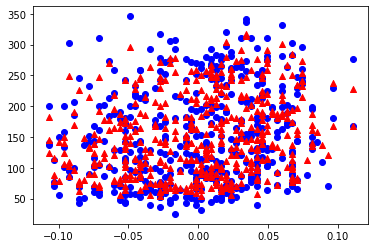

In [53]:
plt.scatter(X[:,0],y,marker='o', color='blue')
plt.scatter(X[:,0],y_pred,marker='^',color='red')
plt.show()

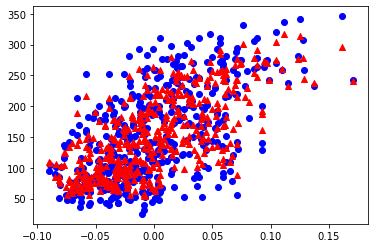

In [54]:
plt.scatter(X[:,2],y,marker='o', color='blue')
plt.scatter(X[:,2],y_pred,marker='^',color='red')
plt.show()

In [48]:
# 정규화 진행(여기서 사용된 데이터는 이미 정규화가 되어있으므로 큰 차이가 없으나, 실 데이터에서는 차이가 있을 것)
scaler = StandardScaler()
X_reg = scaler.fit(X).transform(X)
regressor.fit(X_reg,y)
y_pred = regressor.predict(X_reg)
print(regressor.score(X_reg,y_pred))

1.0
